In [1]:
from sklearn.linear_model import LinearRegression

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
from sklearn.model_selection import train_test_split

In [4]:
X, y = np.arange(10).reshape((5, 2)), range(5)

In [5]:
X

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [6]:
list(y) # <---- label for each of the feature rows

[0, 1, 2, 3, 4]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [8]:
X_train

array([[6, 7],
       [8, 9],
       [2, 3]])

In [9]:
X_test

array([[0, 1],
       [4, 5]])

## Intro to Linear Regression

In [13]:
df = pd.read_csv('USA_Housing.csv')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [16]:
df.describe() #<--- statistics for the numeric cols

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [17]:
df.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population', u'Price', u'Address'],
      dtype='object')

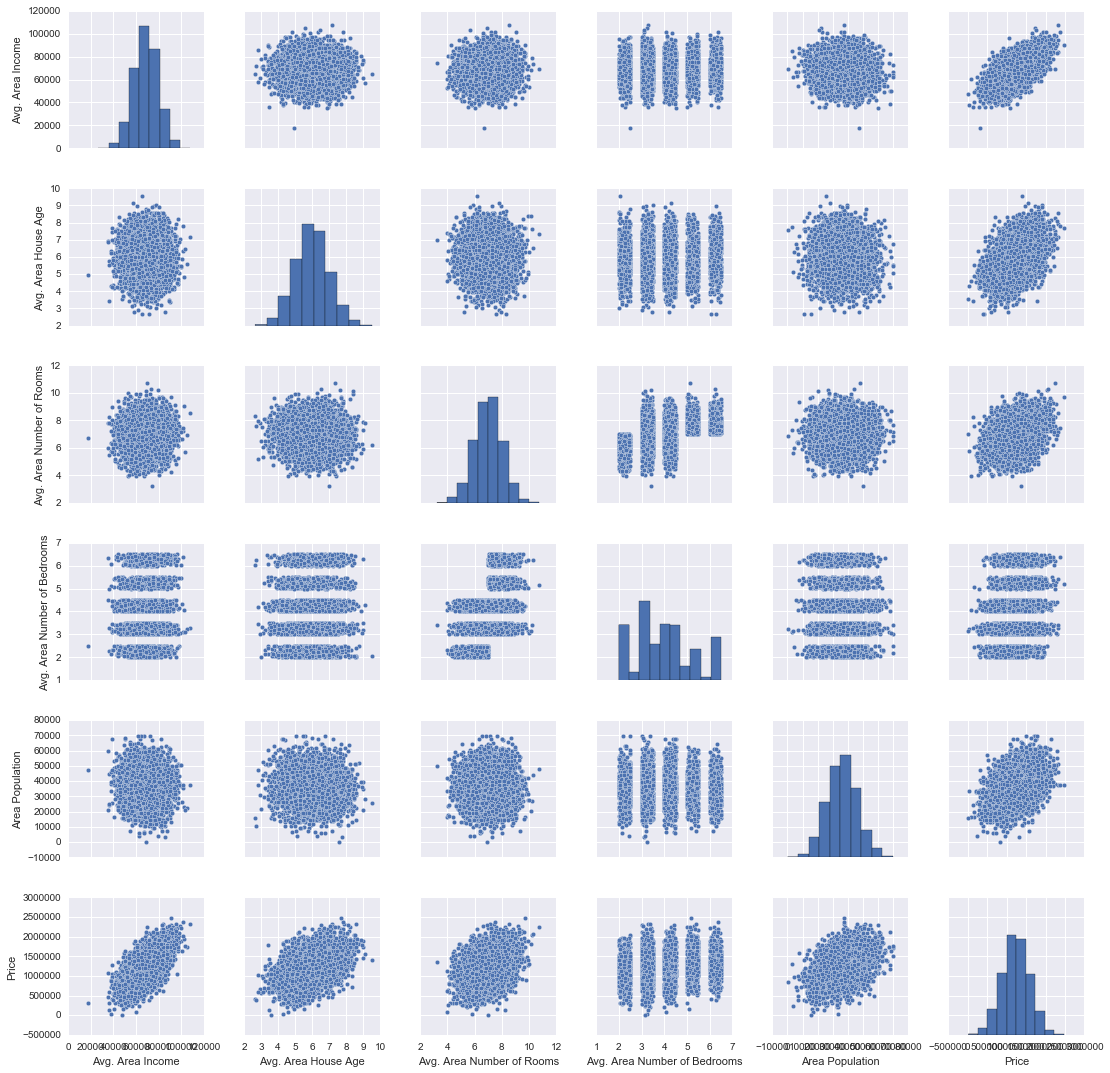

In [18]:
sns.pairplot(df)

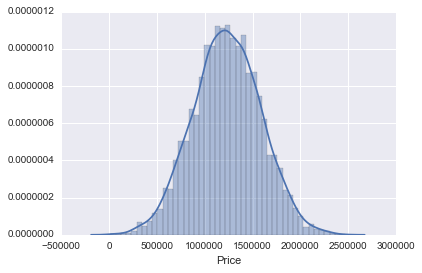

In [19]:
# check the distribution of the target: y
sns.distplot(df['Price'])

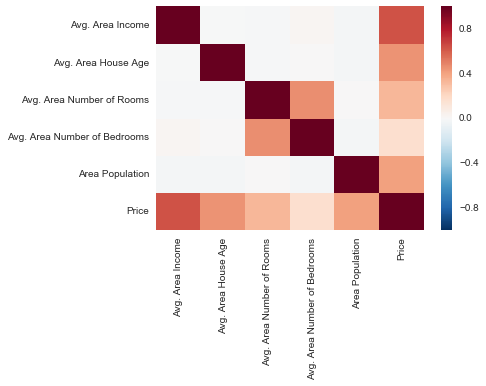

In [20]:
sns.heatmap(df.corr())

### for now, remove the address since we cannot use in linear regression model

In [22]:
X = df[['Avg. Area Income', 'Avg. Area House Age',
       'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
       'Area Population']]
y = df['Price']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state= 101) #<--- like set seed...

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print lm.intercept_

-2640159.79685


In [28]:
print lm.coef_

[  2.15282755e+01   1.64883282e+05   1.22368678e+05   2.23380186e+03
   1.51504200e+01]


In [29]:
X_train.columns

Index([u'Avg. Area Income', u'Avg. Area House Age',
       u'Avg. Area Number of Rooms', u'Avg. Area Number of Bedrooms',
       u'Area Population'],
      dtype='object')

In [31]:
cdf = pd.DataFrame(lm.coef_, X_train.columns, columns = ['Coeff'])

In [32]:
cdf

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


## Boston Dataset, real world data?

In [33]:
from sklearn.datasets import load_boston

In [34]:
boston = load_boston()

In [35]:
boston.keys()

['data', 'feature_names', 'DESCR', 'target']